In [170]:
import h5py 
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import signal

def synca_phase_model(radial_position, roll=0, n=60):
    #radial position in mm
    wavelength = 3e8 / 25.86e9
    r_array = 0.1
    theta_array = np.arange(0, n, 1) * 2 * np.pi / n
    x_array = r_array * np.cos(theta_array)
    y_array = r_array * np.sin(theta_array)

    d = np.sqrt((x_array - radial_position*0.001) ** 2 + y_array ** 2)
    arctan = np.arctan2(-y_array, radial_position*0.001-x_array)
    #arctan = np.arange(0, 120, 1)*2*np.pi/120
    #print(arctan)
    spatial = 2*np.pi * d/wavelength
    phase = np.roll(spatial, roll) + arctan
    phase -= phase[0]
    
    return phase


def synca_phase_model2(ideal_x, r=0.1, f=25.86e9, roll=-30):
    
    array_antenna_theta = np.arange(0, 120, 1) * 2 * np.pi / 120
    
    xantenna = (r * np.cos(-1 * array_antenna_theta))
    yantenna = (r * np.sin(-1 * array_antenna_theta))
    
    #antispiral = -np.arctan2(yantenna, xantenna-ideal_x)
    antispiral = -np.arctan2(yantenna, xantenna-ideal_x)
    ideal_y = 0.0
    
    distances = np.sqrt(
        (xantenna - ideal_x) ** 2
        + (yantenna - ideal_y) ** 2
    )
    
    model_phases =  np.unwrap(np.roll(2 * np.pi * distances * f / 3e8 - 1 * antispiral, roll))
    model_phases -= model_phases[0]
    
    return model_phases


In [117]:
datapath = Path.home()/'group'/'project'/'datasets'/'data'/'lab'/'dig'
filename = '211213_cres2_meas_3ch.h5'
h5file = h5py.File(datapath/filename, 'r')
print(h5file['range3cm_step1mm_z0mm'].keys())
h5file['range3cm_step1mm_z0mm']['0'].shape
#array = h5file['range3cm_step1mm_z0mm'][:]



<KeysViewHDF5 ['0', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '4', '5', '6', '7', '8', '9', 'lo_f', 'step', 'z']>


(120, 4, 32758)

# shrink data

In [118]:
radii = np.arange(0, 31, 1)
channels = np.arange(0, 120, 1)
samples  = 3*8192

combined_matrix = np.zeros((radii.size, channels.size, 3*8192), dtype=np.complex64)

for i in radii:
    select_data = h5file['range3cm_step1mm_z0mm'][f'{i}'][np.arange(0, 120, 1), 1, 4096:3*8192+4096]
    combined_matrix[i, :] = select_data

In [119]:
fft_data = np.fft.fft(combined_matrix, axis=-1, norm='forward')

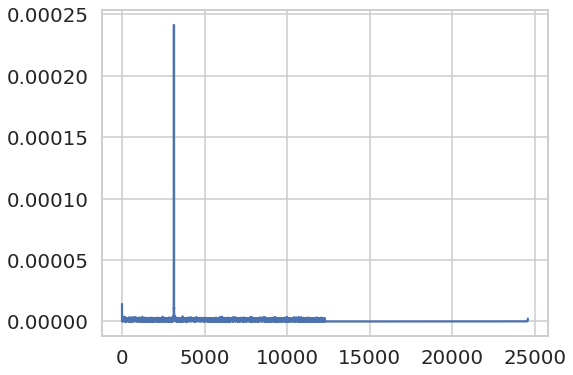

In [120]:
sns.set_theme(context='talk', style='whitegrid', font_scale=1.2)
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1,1,1)

ax.plot(abs(fft_data[0, 0, :]))

In [123]:
signal_freq_ind = 3146
for i in range(fft_data.shape[0]):
    for j in range(fft_data.shape[1]):
        #print(signal.find_peaks(abs(fft_data[i, j, :]), threshold=1e-5))
        pass
#print(peaks)

In [127]:
fft_data[:, :, signal_freq_ind].shape

(31, 120)

In [128]:
phases = np.angle(fft_data[:, :, signal_freq_ind])
phases = np.unwrap(phases, axis=-1)
phases -= phases[:, 0][:, np.newaxis]

In [129]:
phases.shape

(31, 120)

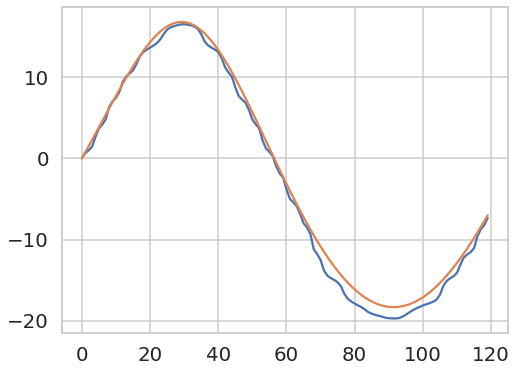

In [145]:
sns.set_theme(style='whitegrid', context='talk', font_scale=1.2)
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1,1,1)

r = 30

ax.plot(np.unwrap(phases[r, :]))
ax.plot(-synca_phase_model(r, n=120, roll=30))

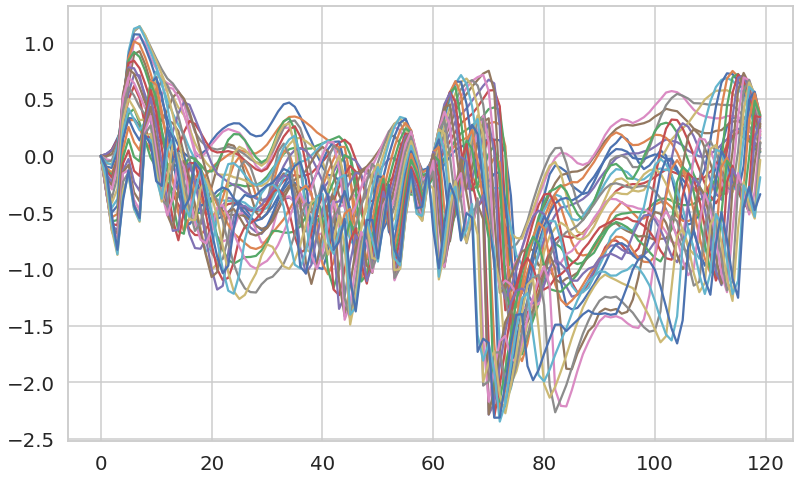

In [147]:
sns.set_theme(style='whitegrid', context='talk', font_scale=1.2)
fig = plt.figure(figsize=(13, 8))
ax = fig.add_subplot(1,1,1)


for r in radii:
    ax.plot(np.roll(np.unwrap(phases[r, :])+synca_phase_model(r, n=120, roll=30), 0))
    #ax.plot(-synca_phase_model(r, n=120, roll=30))

# compare synca models

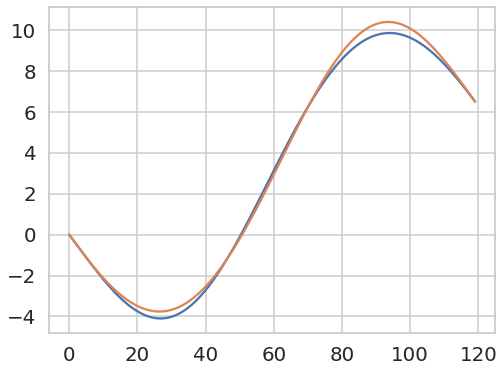

In [178]:
sns.set_theme(style='whitegrid', context='talk', font_scale=1.2)
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1,1,1)

r = 10

ax.plot(synca_phase_model(r, n=120, roll=30))
ax.plot(-synca_phase_model2(r*0.001))


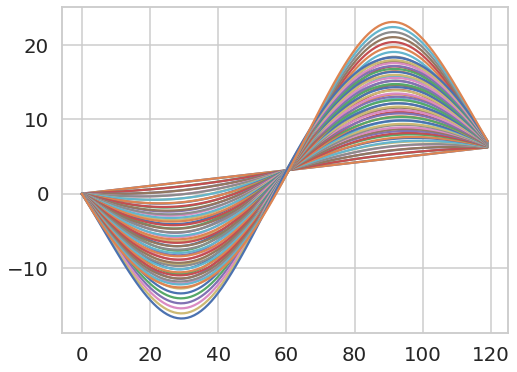

In [179]:
sns.set_theme(style='whitegrid', context='talk', font_scale=1.2)
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1,1,1)

for r in np.arange(0, 31, 1):
    ax.plot(synca_phase_model(r, n=120, roll=30))
    ax.plot(-synca_phase_model2(r*0.001))

    

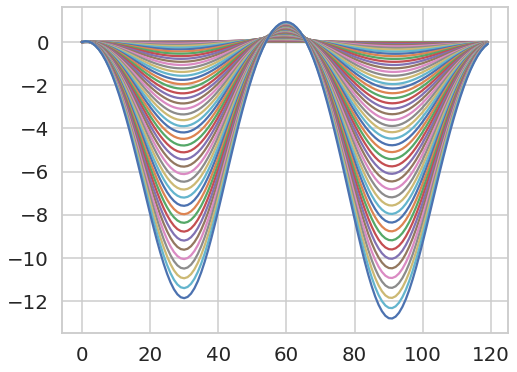

In [184]:
sns.set_theme(style='whitegrid', context='talk', font_scale=1.2)
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1,1,1)

for r in np.arange(0, 51, 1):
    ax.plot(synca_phase_model(r, n=120, roll=30)+synca_phase_model2(r*0.001))
    #ax.plot(synca_phase_model2(r*0.001))

    